In [27]:
# 1. Import necessary libraries
import csv
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [28]:
# Load data from csv
DATE_FORMAT = "%Y-%m-%d"
time_step = []
prices = []
with open('../data/BTC-USD.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader) # skip header
    for row in reader:
        if row[4] != 'null':
            time_step.append(datetime.strptime(row[0], DATE_FORMAT).date())
            prices.append(float(row[4]))

In [29]:
def plot_series(time, data, title='Bitcoin price', xlabel='year', ylabel='price'):
    plt.plot(time, data)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.show()

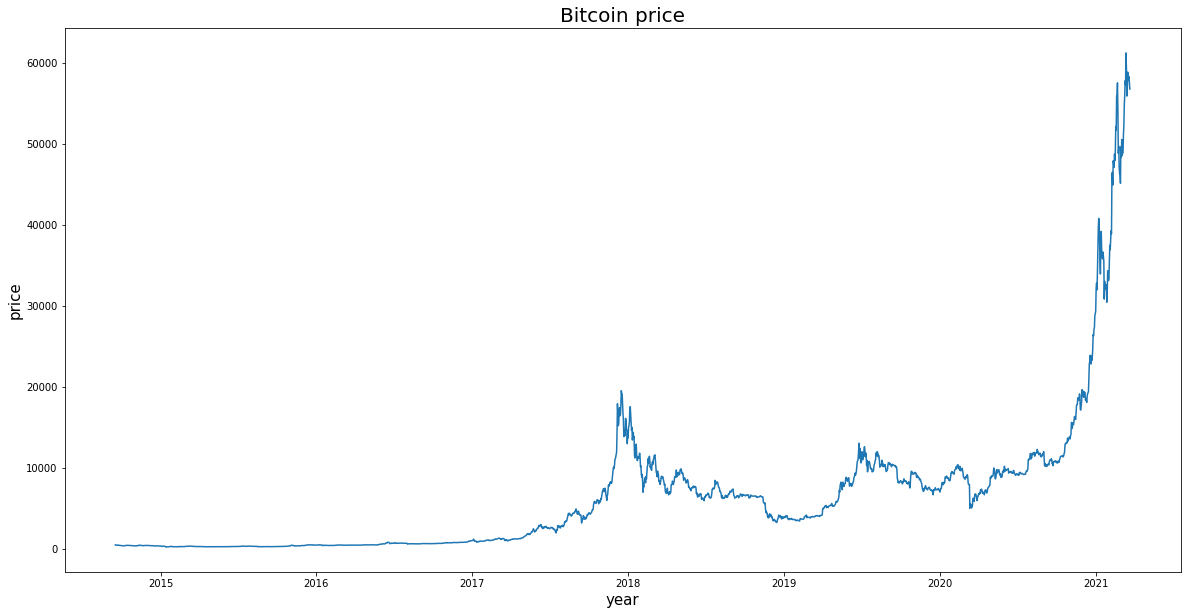

In [30]:
# Plot data on a chart
time = np.array(time_step)
series = np.array(prices)
plt.figure(figsize=(20,10))
plot_series(time, series)

In [34]:
split_time=1900 #TODO: calculate it based on dataset size
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

print("Size of train set: " + str(len(x_train)))
print("Size of validation set: " + str(len(x_valid)))

window_size = 60
batch_size = 100
shuffle_buffer_size = 1000

Size of train set: 1900
Size of validation set: 475


In [35]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
